In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# word2vec vs glove

[97, 117, 107, 127] [84, 86, 85, 87]
Running significance for experiments [97, 84]
Running significance for experiments [117, 86]
Running significance for experiments [107, 85]
Running significance for experiments [127, 87]

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/seaborn/seaborn/categorical.py:2642: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)

  UserWarning)




['Mult', 'Add', 'Right*', 'Left*']


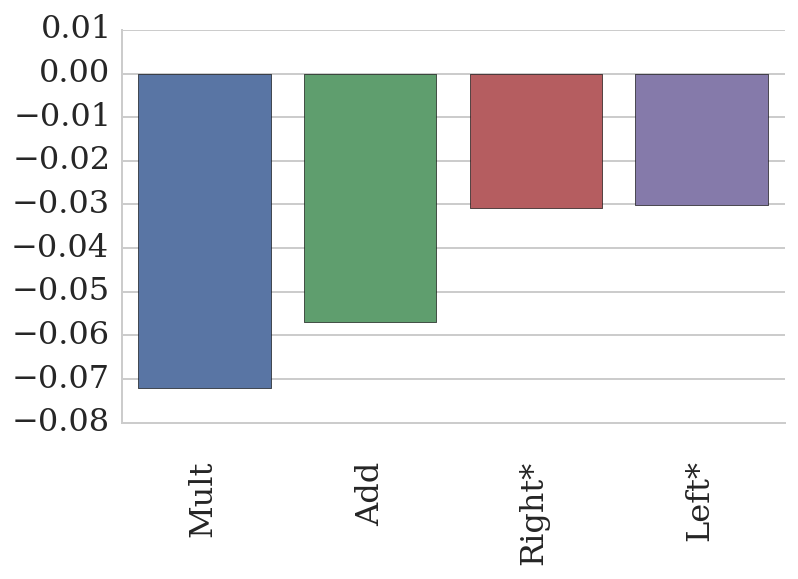

In [2]:
d = {'expansions__noise': 0.0, 
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler', 
     'expansions__k': 3, 
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled_percentage': 100.0,
     'expansions__vectors__unlabelled' : 'wiki',
     'labelled': 'amazon_grouped-tagged', 
     'expansions__vectors__algorithm': 'word2vec', 
     'labelled': 'amazon_grouped-tagged',
     'document_features_tr': 'J+N+AN+NN',
     'document_features_ev': 'AN+NN',
     'expansions__vectors__unlabelled_percentage':100,
     'expansions__entries_of':None,
     'expansions__vectors__composer__in': ['Add', 'Mult', 'Right', 'Left']}

def _get(d):
    return [x.id for x in Experiment.objects.filter(**d).order_by('expansions__vectors__algorithm', 'expansions__vectors__composer')]

w2v = _get(d)
d['expansions__vectors__algorithm'] =  'glove'
glove = _get(d)

print(w2v, glove)
diff_plot(w2v, glove, [Experiment.objects.get(id=id).expansions.vectors.composer for id in w2v])
plt.savefig('plot-w2v-vs-glove-deltas.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

Running significance for experiments [97, 84]
Running significance for experiments [117, 86]
Running significance for experiments [107, 85]
Running significance for experiments [127, 87]


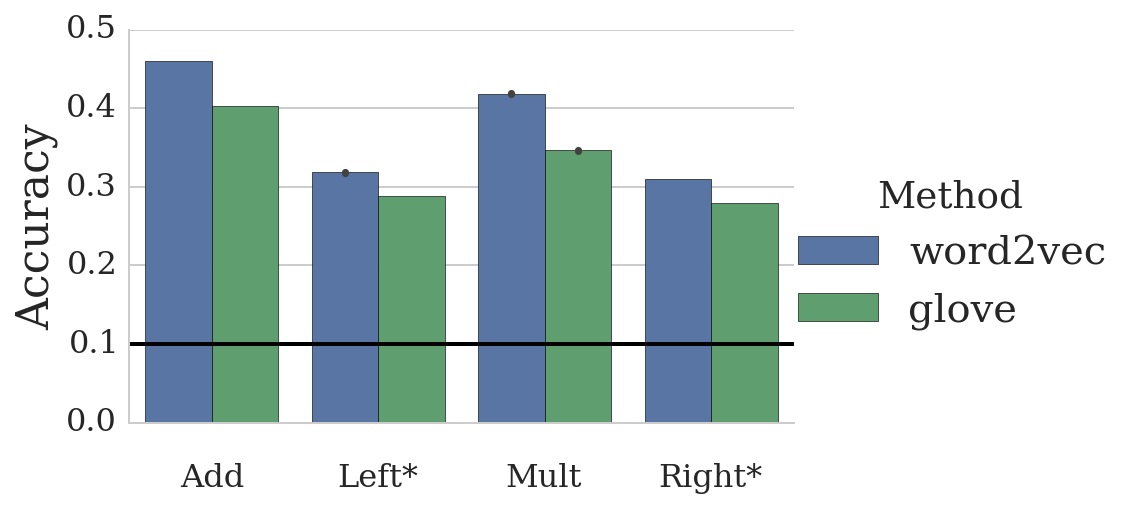

In [3]:
diff_plot_bar(w2v, glove, 'word2vec', 'glove',
           [Experiment.objects.get(id=id).expansions.vectors.composer for id in w2v],
             xlabel='', hline_at=0.1)